# t-SNE of Microbial Datasets in Building Materials

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-9-372b3691694c>, line 6)

## t-SNE analysis of OTU dataset

In [2]:
'''Formatting CLR transformed data file'''
file_loc1 = "16S_OTU_clr_Table_zcomp_ogrows.csv"
OTU_table = pd.read_csv(file_loc1, low_memory=False)

'''t-SNE had an issue with string variables being in the index values of the table
   So, OTUs were reduced to exclusively number values'''
OTU_table['OTU'] = OTU_table['OTU'].replace(to_replace ='New.CleanUp.ReferenceOTU', value = '', regex = True) 
OTU_table['OTU'] = OTU_table['OTU'].replace(to_replace ='New.ReferenceOTU', value = '', regex = True) 

'''Removing duplicates and re-runs
cols = [c for c in OTU_table.columns if not(c.endswith("DUP")) and not(c.endswith("RE"))]
OTU_table=OTU_table[cols]
'''
OTU_table = OTU_table.set_index('OTU')

'''Sample table was transposed to match the format of the mapping table'''
OTU_table = OTU_table.T

OTU_table

OTU,4479944,1050608,4307316,141700,185100,114072,590450,253429,1124709,1081058,...,34699,34757,34791,34796,34821,34824,34826,34840,34867,34905
control.Gypsum.dry.TP0,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,...,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489,-0.026489
control.Gypsum.dry.TP0.DUP,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,3.056142,3.702769,-0.034900,-0.034900,-0.034900,...,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900,-0.034900
control.Gypsum.dry.TP1,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,...,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613,-0.028613
control.Gypsum.dry.TP1.RE,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,...,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418,-0.029418
control.Gypsum.dry.TP1.RE.DUP,-0.033493,-0.033493,3.991859,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,...,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493,-0.033493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc2.Plywood.wet.TP5.RE.DUP,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,...,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,-0.016893,0.676254,-0.016893,-0.016893
loc2.Plywood.wet.TP6,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,...,-0.014190,-0.014190,0.678957,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190,-0.014190
loc2.Plywood.wet.TP6.DUP,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,...,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516,-0.012516
loc2.Plywood.wet.TP6.RE,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,...,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999,-0.018999


In [3]:
'''Mapping table w/ features of interest'''
file_loc2 = "16S_OTU_clr_Table_map.csv"

OTU_map_table = pd.read_csv(file_loc2, names=['location','material','wet_dry','time','ID'], skiprows=1)
OTU_map_table

,location,material,wet_dry,time,ID
control.Gypsum.dry.TP0,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0
control.Gypsum.dry.TP0.DUP,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0.DUP
control.Gypsum.dry.TP1,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1
control.Gypsum.dry.TP1.RE,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1.RE
control.Gypsum.dry.TP1.RE.DUP,control,Gypsum,dry,TP1,control.Gypsum.dry.TP1.RE.DUP
...,...,...,...,...,...
loc2.Plywood.wet.TP5.RE.DUP,loc2,Plywood,wet,TP5,loc2.Plywood.wet.TP5.RE.DUP
loc2.Plywood.wet.TP6,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6
loc2.Plywood.wet.TP6.DUP,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6.DUP
loc2.Plywood.wet.TP6.RE,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6.RE


In [4]:
from sklearn.manifold import TSNE

'''
Most important parameters:
    1) Metric - options listed in scipy.spatial.distance.pdist, which includes 'euclidean', 'jaccard', and 'braycurtis'
        Most promising results seemed to be with the braycurtis metric
    2) Perplexity - values are typically 5-50
        Low values imply a high degree of local variation, high values imply the opposite
        Perplexity of 30 is the default
'''
tsne = TSNE(metric = 'braycurtis', perplexity=30)
embeddings = tsne.fit_transform(OTU_table)
plot_samples = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)
embeddings

array([[-1.35398569e+01, -8.85655522e-01],
       [-1.74440498e+01,  9.05623055e+00],
       [-1.51654406e+01,  4.55369830e-01],
       [-1.50520449e+01,  3.70236564e+00],
       [-1.55501881e+01,  7.97652245e+00],
       [-1.06233435e+01, -3.86675596e+00],
       [-1.28829241e+01, -2.72776425e-01],
       [-9.63570404e+00, -3.88577604e+00],
       [-3.12765217e+00, -5.78393984e+00],
       [-5.30203247e+00, -1.93202758e+00],
       [-6.97150564e+00, -6.29785299e+00],
       [-9.95372963e+00, -5.91892433e+00],
       [ 1.27792892e+01, -1.41017237e+01],
       [ 1.31391258e+01, -1.45255032e+01],
       [ 1.21820021e+01, -1.40419779e+01],
       [ 1.38474264e+01, -1.34694614e+01],
       [ 1.45706396e+01, -1.35113478e+01],
       [ 1.05942564e+01, -1.23109169e+01],
       [-1.17559032e+01, -7.18377888e-01],
       [ 1.37970181e+01, -1.24622707e+01],
       [ 1.64519405e+01, -1.40831909e+01],
       [ 1.61471519e+01, -1.39429865e+01],
       [ 9.83692074e+00, -1.14290917e+00],
       [ 1.

In [5]:
'''Outlining the parameters of the t-SNE test'''
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='braycurtis', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30,
     random_state=None, verbose=0)

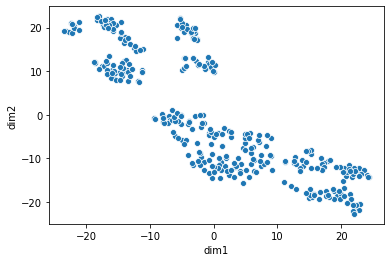

In [13]:
'''Unlabeled t-SNE'''
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_samples)

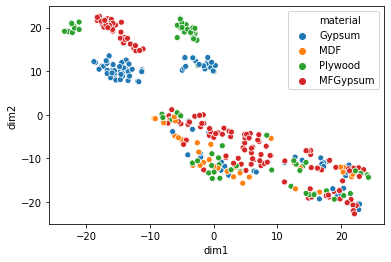

In [14]:
'''Labeled t-SNE as specified by hue'''
plot_samples = pd.concat([plot_samples, OTU_map_table['material']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'material', data = plot_samples)

## t-SNE analysis of metabolite dataset

In [362]:
file_loc3 = "metabolites_clr_Table_zcomp.csv"
metab_table = pd.read_csv(file_loc3, low_memory=False)

metab_table = metab_table.T

'''Dropped the row associated with the compound number since it is not needed for the t-SNE analysis'''
metab_table = metab_table.drop(['Unnamed: 0'])
metab_table

,0,1,2,3,4,5,6,7,8,9,...,6190,6191,6192,6193,6194,6195,6196,6197,6198,6199
control.MF.Gypsum.dry.TP0,2.40474,2.06285,2.28952,1.42352,1.41669,1.35372,0.632976,-0.782839,1.91048,0.709037,...,-1.19907,-0.448856,0.385776,-0.868042,-0.915871,-0.466012,-0.360369,-1.69721,-1.18766,-1.11414
control.Plywood.dry.TP0,2.62156,0.933759,2.3034,1.55263,1.36981,-1.02306,0.172565,-0.980479,1.82213,0.539399,...,-1.164,-0.541163,0.569752,-0.807109,-1.22775,-0.165295,-0.672245,-2.15174,-1.639,-1.56866
control.MDF.dry.TP0,3.31382,3.2705,2.55154,1.96859,2.48627,1.37015,0.597524,-0.211314,1.9856,1.36801,...,-1.03309,0.0717625,0.266875,-0.426942,-0.618533,0.0226474,-0.0630305,-1.89107,-1.22946,-1.308
control.Gypsum.dry.TP0,2.28136,2.86396,2.48118,1.75938,1.74884,1.42149,0.555901,-0.589396,2.17873,0.998479,...,-0.697097,0.557111,0.56801,0.31554,-0.588446,0.207265,-0.0329437,-1.70133,-1.09511,-1.11825
loc1.MF.Gypsum.dry.TP0,3.25455,3.2809,0.368424,-0.357017,2.06219,1.08438,0.595355,0.76095,1.8272,0.400044,...,-0.825682,0.214343,0.292068,-0.149264,-0.969634,0.394332,-0.412127,-1.88481,-1.56021,-1.41933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
loc2.Gypsum.dry.TP6,7.80573,7.79597,6.93544,6.60959,6.42106,1.4936,6.35744,4.37412,6.26896,5.02986,...,-1.30173,-1.015,-1.27385,-1.25657,-2.19329,-0.772664,-1.63067,-3.1029,-2.07402,-2.51982
loc2.MF.Gypsum.wet.TP6,4.33241,4.80529,2.2884,3.03744,4.76134,1.69229,3.24848,2.60326,3.7784,1.62267,...,-1.14785,0.94543,-2.39857,0.70386,-1.25297,-0.176273,-0.49062,-2.03432,-1.78596,-1.59244
loc2.Plywood.wet.TP6,8.54052,8.72095,6.70614,7.35106,5.717,6.38682,6.67007,3.43837,7.04385,4.10596,...,-0.518887,-0.784466,-1.50951,-1.02604,-1.77987,-1.74986,-1.22437,-2.56121,-1.75582,-1.97814
loc2.MDF.wet.TP6,8.27439,9.0712,5.11605,7.32956,7.82507,3.36245,7.17395,7.01618,7.32353,7.13953,...,-0.394229,-0.664,-1.63564,-1.3512,-2.21154,-1.41858,-1.65604,-2.99289,-1.56988,-2.40981


In [363]:
'''Mapping table w/ features of interest'''
file_loc4 = "metab_map.csv"

metab_map_table = pd.read_csv(file_loc4, names=['location_m','material_m','wet_dry_m','time_m','ID_m'], skiprows=1)
metab_map_table

,location_m,material_m,wet_dry_m,time_m,ID_m
control.MF.Gypsum.dry.TP0,control,MFGypsum,dry,TP0,control.MF.Gypsum.dry.TP0
control.Plywood.dry.TP0,control,Plywood,dry,TP0,control.Plywood.dry.TP0
control.MDF.dry.TP0,control,MDF,dry,TP0,control.MDF.dry.TP0
control.Gypsum.dry.TP0,control,Gypsum,dry,TP0,control.Gypsum.dry.TP0
loc1.MF.Gypsum.dry.TP0,loc1,MFGypsum,dry,TP0,loc1.MF.Gypsum.dry.TP0
...,...,...,...,...,...
loc2.Gypsum.dry.TP6,loc2,Gypsum,dry,TP6,loc2.Gypsum.dry.TP6
loc2.MF.Gypsum.wet.TP6,loc2,MFGypsum,wet,TP6,loc2.MF.Gypsum.wet.TP6
loc2.Plywood.wet.TP6,loc2,Plywood,wet,TP6,loc2.Plywood.wet.TP6
loc2.MDF.wet.TP6,loc2,MDF,wet,TP6,loc2.MDF.wet.TP6


In [364]:
from sklearn.manifold import TSNE

'''Most important parameters:
    1) Metric - options listed in scipy.spatial.distance.pdist, which includes 'euclidean', 'jaccard', and 'braycurtis'
        Most promising results seemed to be with the braycurtis metric
    2) Perplexity - values are typically 5-50
        Low values imply a high degree of local variation, high values imply the opposite
        Perplexity of 30 is the default
'''
tsne = TSNE(metric = 'euclidean', perplexity=30)
embeddings = tsne.fit_transform(metab_table)
plot_metab = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = metab_table.index)
embeddings

array([[ -1.6728665 , -23.825962  ],
       [ 19.477362  ,  -2.2214618 ],
       [  5.479558  ,  -1.9544177 ],
       [  3.9305105 ,  -7.7223487 ],
       [ -0.15761383, -18.910769  ],
       [ 20.922901  ,   0.4748092 ],
       [  9.247341  ,  -3.6083436 ],
       [  2.1045148 ,  -5.8487988 ],
       [  6.9090133 , -22.922804  ],
       [ 19.631702  ,   2.6848547 ],
       [  6.443844  ,  -3.4374182 ],
       [  0.7529421 ,  -5.852465  ],
       [ -1.0881312 , -22.146013  ],
       [  7.087847  ,  -2.2469559 ],
       [ 19.13984   ,  -0.5728474 ],
       [  2.8975337 ,  -7.1642284 ],
       [ -6.2708945 , -21.064692  ],
       [ 21.030563  ,   4.6703787 ],
       [ -9.912718  ,  16.008272  ],
       [ -3.8317146 ,  -6.8238263 ],
       [  0.44992208, -20.017801  ],
       [ 20.98074   ,   2.3803906 ],
       [  8.06222   ,  -3.7372153 ],
       [  1.271866  ,  -9.554957  ],
       [ -1.6898267 , -15.999498  ],
       [-11.272676  ,  20.610579  ],
       [ -9.659882  ,  17.513662  ],
 

In [365]:
'''Outlining the parameters of the t-SNE test'''
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, perplexity=30,
     random_state=None, verbose=0)

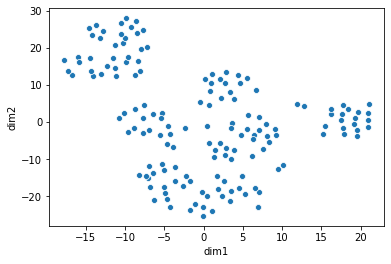

In [366]:
'''Unlabeled t-SNE'''
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_metab)

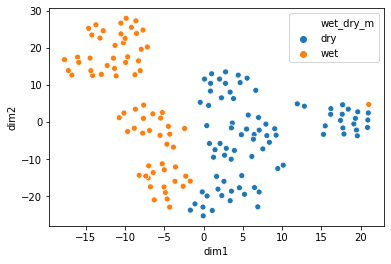

In [369]:
'''Labeled t-SNE as specified by hue'''
plot_metab = pd.concat([plot_metab, metab_map_table['wet_dry_m']], axis = 1, sort=False)
sns.scatterplot(x = 'dim1', y = 'dim2', hue = 'wet_dry_m', data = plot_metab)

# UMAP of Microbial Datasets in Building Materials

In [7]:
import umap
reducer = umap.UMAP(n_components = 2, n_neighbors = 15, metric = 'jaccard', random_state = 0)
embeddings = reducer.fit_transform(OTU_table)
plot_df = pd.DataFrame(data = embeddings, columns = ['dim1', 'dim2'], index = OTU_table.index)
# Like before, we can plot our lower dimensional embedding without labels:
sns.scatterplot(x = 'dim1', y = 'dim2', data = plot_df)

ModuleNotFoundError: No module named 'umap'